In [179]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

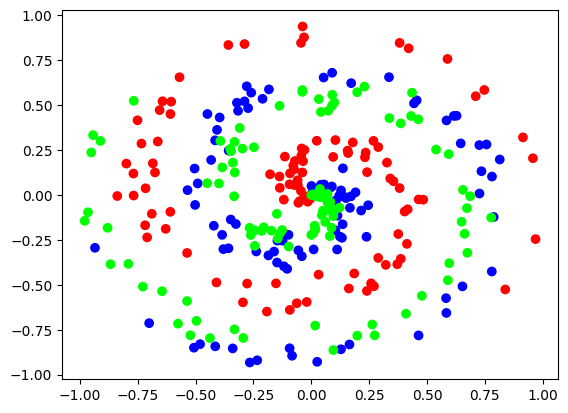

In [180]:
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='brg')
plt.show()

In [181]:
class Layer_Dense:
    def __init__(self, n_inputs, n_nuerons):
        # Initialize weights and biases
        self.weights = .01 * np.random.randn(n_inputs, n_nuerons)
        self.biases = np.zeros((1,n_nuerons))
    def forward(self, inputs):
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases

In [182]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Perform a forward pass of our training data through this layer
dense1.forward(X)
# Let's see output of the first few samples:
print(dense1.output[0:5]) 

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11171044e-04 -5.11007493e-05 -1.12099799e-04]
 [ 2.99257295e-06 -2.69126613e-04 -1.45165104e-04]
 [ 8.95101766e-05 -4.30442247e-04 -1.68079801e-04]
 [-3.49893759e-04 -3.07208364e-04 -4.33002861e-04]]


In [183]:
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Calculate output values from input
        self.output = np.maximum(0, inputs)

In [184]:
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Make a forward pass of our training data through this layer
dense1.forward(X)
# Forward pass through activation func.
# Takes in output from previous layer
activation1.forward(dense1.output)
print(activation1.output[:5])

[[0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.3520580e-04 1.8173116e-05 0.0000000e+00]
 [2.3245417e-04 0.0000000e+00 0.0000000e+00]
 [3.8226307e-04 0.0000000e+00 0.0000000e+00]
 [5.7436468e-04 0.0000000e+00 0.0000000e+00]]


In [185]:
class Activation_Softmax():
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values/np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

In [186]:
softmax = Activation_Softmax()
softmax.forward([[1,2,3]])
print(softmax.output)

[[0.09003057 0.24472847 0.66524096]]


In [187]:
X, y = spiral_data(samples=100, classes=3)
dense1 = Layer_Dense(2, 3)
dense2 = Layer_Dense(3, 3)
activation1 = Activation_ReLU()
activation2 = Activation_Softmax()
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)
print(activation2.output[:5])


[[0.33333334 0.33333334 0.33333334]
 [0.33333322 0.33333343 0.33333334]
 [0.33333296 0.33333388 0.3333332 ]
 [0.3333323  0.33333504 0.33333266]
 [0.33333194 0.33333552 0.33333248]]


In [188]:
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = np.array([[1, 0, 0],
                          [0, 1, 0],
                          [0, 1, 0]])

In [189]:
class Loss:
    def calculate(self,output,y):
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)
        return data_loss

In [190]:
class Loss_CategoricalCrossentropy(Loss):

    def forward(self, y_pred, y_true):
        samples = len(y_pred)

        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples),y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true,axis=1)

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [191]:
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


In [192]:
X, y = spiral_data(samples=100, classes=3)

dense1 = Layer_Dense(2, 3)
dense2 = Layer_Dense(3, 3)
activation1 = Activation_ReLU()
activation2 = Activation_Softmax()
loss_function = Loss_CategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss = loss_function.calculate(activation2.output, y)
predictions = np.argmax(activation2.output, axis=1)

if len(y.shape) == 2:
    y = np.argmax(y, axis=1)
accuracy = np.mean(predictions==y)

print(activation2.output[:5])
print(loss)
print(accuracy)

[[0.33333334 0.33333334 0.33333334]
 [0.3333327  0.33333316 0.33333412]
 [0.3333331  0.33333325 0.3333336 ]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
1.0986098
0.32666666666666666


In [204]:
# Dense layer
class Layer_Dense:
    
    def __init__(self, inputs, neurons, weight_regularizer_l1=0, 
                 weight_regularizer_l2=0, bias_regularizer_l1=0, bias_regularizer_l2=0):
        self.weights = 0.01 * np.random.randn(inputs, neurons)
        self.biases = np.zeros((1, neurons))
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l1 = bias_regularizer_l1
        self.bias_regularizer_l2 = bias_regularizer_l2
        
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        self.inputs = inputs

    def backward(self, dvalues):
        #Gradients on the parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis = 0, keepdims = True)
        
        # Gradients on regularization
        
        if self.weight_regularizer_l1 > 0:
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            self.dweights += self.weight_regularizer_l1 * dL1
        
        if self.weight_regularizer_l2 > 0:
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights
      
        if self.bias_regularizer_l1 > 0:
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1

        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases

        #Gradients on values
        self.dinputs = np.dot(dvalues, self.weights.T)
        
# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)
        self.inputs = inputs
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()
        self.dinputs[self.inputs <= 0] = 0

class Loss:
    def calculate(self,output,y):
        sample_losses = self.forward(output,y)
        data_loss = np.mean(sample_losses)
        return data_loss
    def regularization_loss(self, layer):
        # 0 by default
        regularization_loss = 0
        
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights))
        
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights * layer.weights)
        
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases))

        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases * layer.biases)
            
        return regularization_loss

class Loss_CategoricalCrossentropy(Loss):

    def forward(self, y_pred, y_true):
        samples = len(y_pred)

        y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples),y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true,axis=1)

        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        labels = len(dvalues[0])
        
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
            #OKAY here we are taking the [2,4,1,3] into a 2D matrix with 1's on that index and 0 elsewhere
        # Calculate gradient
        self.dinputs = -y_true / dvalues 
        
        # Normalize gradient
        self.dinputs = self.dinputs / samples

class Activation_Softmax():
    
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values/np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities
        #All this function does is get the softmax values based on the inputs. It is LITERALLY JUST AN EQUATION

    def backward(self, dvalues):
        self.dinputs = np.empty_like(dvalues)

        for index, (single_output, single_dvalue) in enumerate(zip(self.output, dvalues)):
            single_output = single_output.reshape(-1,1)

            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)

            self.dinputs[index] = np.dot(jacobian_matrix,single_dvalue)


class Activation_Softmax_Loss_CategoricalCrossentropy():
    
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()
        
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
            # OKAY OKAY so this here gets the index of where there is a 1 in the y_true (so if we are 
            # trying to predict numbers drawn 0-9 and the number is 2, it would be [0,0,1,0...] and return 2)
            
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1 #Anywhere that was the correct probability, we subtract 1 to get the loss for that
        #example if we had .99 confidence then the loss is only -.01, versus if our confidence was .6, then our loss is -.4
        
        # Normalize gradient
        self.dinputs = self.dinputs / samples

class Layer_Dropout():
    def __init__(self, rate):
        self.rate = 1 - rate

    def forward(self, inputs):
        self.inputs = inputs
        self.binary_mask = np.random.binomial(1, self.rate, size=inputs.shape) / self.rate
        self.output = inputs * self.binary_mask

    def backward(self, dvalues):
        self.dinputs = dvalues * self.binary_mask

In [194]:
class Optimizer_SGD:
    def __init__(self, learning_rate = 1.0, decay = 0., momentum = 0.):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.momentum = momentum
        
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
            
    # Update parameters
    def update_params(self, layer):
        if self.momentum:
            if not hasattr(layer, 'weight_momentums'):
                layer.weight_momentums = np.zeros_like(layer.weights)
                layer.bias_momentums = np.zeros_like(layer.biases)
            
            weight_updates = self.momentum * layer.weight_momentums - self.current_learning_rate * layer.dweights
            layer.weight_momentums = weight_updates
            bias_updates = self.momentum * layer.bias_momentums - self.current_learning_rate * layer.dbiases
            layer.bias_momentums = bias_updates
        else:
            weight_updates = -self.current_learning_rate * layer.dweights
            bias_updates = -self.current_learning_rate * layer.dbiases
            
        layer.weights += weight_updates
        layer.biases += bias_updates
        
    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [195]:
class Optimizer_Adagrad:
    def __init__(self, learning_rate = 1.0, decay = 0., epsilon = 1e-7):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
            
    # Update parameters
    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        layer.weight_cache += layer.dweights ** 2
        layer.bias_cache += layer.dbiases ** 2

        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

        
    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [196]:
class Optimizer_RMSprop:
    def __init__(self, learning_rate = .02, decay = 1e-5, epsilon = 1e-7, rho = .995):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.rho = rho
        
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
            
    # Update parameters
    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
        
        layer.weight_cache = self.rho * layer.weight_cache + (1 - self.rho) * layer.dweights**2
        layer.bias_cache = self.rho * layer.bias_cache + (1 - self.rho) * layer.dbiases**2

        layer.weights += -self.current_learning_rate * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_learning_rate * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

        
    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [203]:
class Optimizer_Adam:
    def __init__(self, learning_rate = .001, decay = 0, epsilon = 1e-7, beta_1 = .9, beta_2 = .999):
        self.learning_rate = learning_rate
        self.current_learning_rate = learning_rate
        self.decay = decay
        self.iterations = 0
        self.epsilon = epsilon
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        
    def pre_update_params(self):
        if self.decay:
            self.current_learning_rate = self.learning_rate * (1. / (1. + self.decay * self.iterations))
            
    # Update parameters
    def update_params(self, layer):
        if not hasattr(layer, 'weight_cache'):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)

        layer.weight_momentums = self.beta_1 * layer.weight_momentums + (1 - self.beta_1) * layer.dweights
        layer.bias_momentums = self.beta_1 * layer.bias_momentums + (1 - self.beta_1) * layer.dbiases

        weight_momentums_corrected = layer.weight_momentums / (1 - self.beta_1 ** (self.iterations + 1))
        bias_momentums_corrected = layer.bias_momentums / (1 - self.beta_1 ** (self.iterations + 1))

        
        layer.weight_cache = self.beta_2 * layer.weight_cache + (1 - self.beta_2) * layer.dweights**2
        layer.bias_cache = self.beta_2 * layer.bias_cache + (1 - self.beta_2) * layer.dbiases**2
        
        weight_cache_corrected = layer.weight_cache / (1 - self.beta_2 ** (self.iterations + 1))
        bias_cache_corrected = layer.bias_cache / (1 - self.beta_2 ** (self.iterations + 1))

        layer.weights += -self.current_learning_rate * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_learning_rate * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)
        
    # Call once after any parameter updates
    def post_update_params(self):
        self.iterations += 1

In [198]:
class Activation_Sigmoid():
    def forward(self, inputs):
        self.inputs = inputs
        self.output = 1 /(1 + np.exp(-inputs))

    def backward(self, dvalues):
        self.dinputs = dvalues * (1 - self.output) * self.output

class Loss_BinaryCrossEntropy(Loss):
    def forward(self, y_pred, y_true):
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        sample_losses = -(y_true * np.log(y_pred_clipped) + (1 - y_true) * np.log(1 - y_pred_clipped))
        sample_losses = np.mean(sample_losses, axis=-1)
        
        return sample_losses
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        outputs = len(dvalues[0])
        
        clipped_dvalues = np.clip(dvalues, 1e-7, 1-1e-7)

        self.dinputs = -(y_true / clipped_dvalues - (1 - y_true) / (1 - clipped_dvalues)) / outputs
        
        self.dinputs = self.dinputs / samples

In [199]:
X, y = spiral_data(samples=1000, classes=3)

dense1 = Layer_Dense(2, 512, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)

activation = Activation_ReLU()

dropout1 = Layer_Dropout(.1)
dense2 = Layer_Dense(512,3)

loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

optimizer = Optimizer_Adam(learning_rate = .02, decay = 5e-5)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dropout1.forward(activation1.output)
    dense2.forward(dropout1.output)
    
    data_loss = loss_activation.forward(dense2.output, y)
    regularization_loss = loss_activation.loss.regularization_loss(dense1) + loss_activation.loss.regularization_loss(dense2)
    loss = data_loss + regularization_loss
    
    predictions = np.argmax(loss_activation.output, axis=1)
    
    if (len(y.shape) == 2):
        y = np.argmax(y, axis = 1)
    accuracy = np.mean(predictions == y)

    
    
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
                f'acc: {accuracy:.3f}, ' +
                f'loss: {loss:.3f} (' +
                f'data_loss: {data_loss:.3f}, ' +
                f'reg_loss: {regularization_loss:.3f}), ' +
                f'lr: {optimizer.current_learning_rate}')
        
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    dropout1.backward(dense2.dinputs)
    activation1.backward(dropout1.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()




X_test, y_test = spiral_data(samples=100, classes=3)

dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)

loss = loss_activation.forward(dense2.output, y_test)
predictions = np.argmax(loss_activation.output, axis=1)

if len(y_test.shape) == 2:
    y_test = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions==y_test)

print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

epoch: 0, acc: 0.344, loss: 1.099 (data_loss: 1.099, reg_loss: 0.000), lr: 0.02


AttributeError: 'Activation_ReLU' object has no attribute 'backward'

In [ ]:
X, y = spiral_data(samples=1000, classes=2)

y = y.reshape(-1,1)

dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4)

activation1 = Activation_ReLU()

dense2 = Layer_Dense(64,1)

activation2 = Activation_Sigmoid()

loss_function = Loss_BinaryCrossEntropy()

optimizer = Optimizer_Adam(decay = 5e-7)

for epoch in range(10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    
    data_loss = loss_function.calculate(activation2.output, y)
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2)
    loss = data_loss + regularization_loss
    
    predictions = (activation2.output > 0.5) * 1
    accuracy = np.mean(predictions==y)    

    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
                f'acc: {accuracy:.3f}, ' +
                f'loss: {loss:.3f} (' +
                f'data_loss: {data_loss:.3f}, ' +
                f'reg_loss: {regularization_loss:.3f}), ' +
                f'lr: {optimizer.current_learning_rate}')
        
    loss_function.backward(activation2.output, y)
    activation2.backward(loss_function.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.post_update_params()




X_test, y_test = spiral_data(samples=100, classes=2)

y_test = y_test.reshape(-1,1)

dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
activation2.forward(dense2.output)

loss = loss_function.calculate(activation2.output, y_test)

predictions = (activation2.output > 0.5) * 1
accuracy = np.mean(predictions==y_test)

print(f'validation, acc: {accuracy:.3f}, loss: {loss:.3f}')

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import sine_data
import matplotlib.pyplot as plt

nnfs.init()

In [207]:
class Activation_Linear():
    def forward(self, inputs):
        self.inputs = inputs
        self.output = inputs
        
    def backward(self, dvalues):
        self.dinputs = dvalues.copy()


class Loss_MeanSquaredError(Loss):
    def forward(self, y_pred, y_true):
        sample_losses = np.mean((y_true - y_pred)**2, axis=-1)
        return sample_losses
        
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        outputs = len(dvalues[0])
        
        self.dinputs = -2 * (y_true - dvalues) / outputs
        self.dinputs = self.dinputs / samples


class Loss_MeanAbsoluteError(Loss): # L1 loss
    def forward(self, y_pred, y_true):
        sample_losses = np.mean(np.abs(y_true - y_pred), axis=-1)
        return sample_losses
        
    def backward(self, dvalues, y_true):
        samples = len(dvalues)
        outputs = len(dvalues[0])
        
        self.dinputs = np.sign(y_true - dvalues) / outputs
        self.dinputs = self.dinputs / samples

epoch: 0, acc: 0.002, loss: 0.500 (data_loss: 0.500, reg_loss: 0.000), lr: 0.005


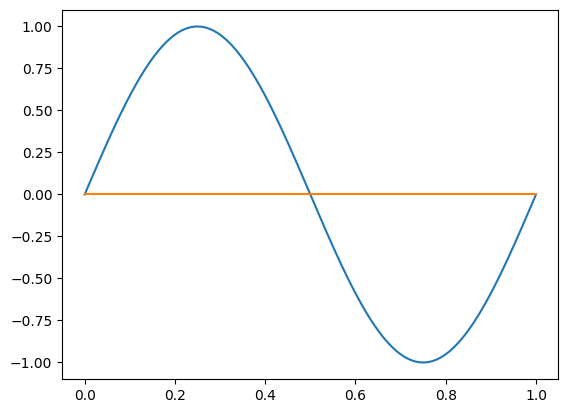

epoch: 1000, acc: 0.793, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.002501250625312656


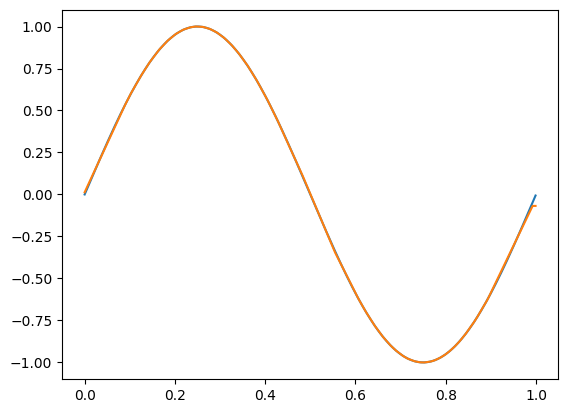

epoch: 2000, acc: 0.614, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0016672224074691564


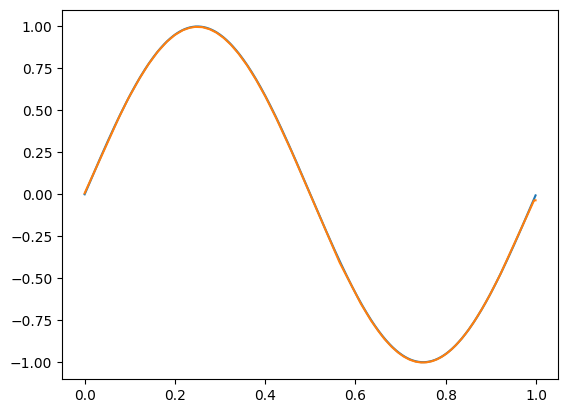

epoch: 3000, acc: 0.160, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0012503125781445363


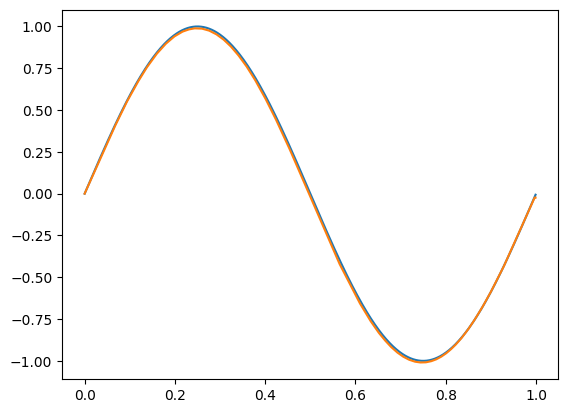

epoch: 4000, acc: 0.976, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0010002000400080014


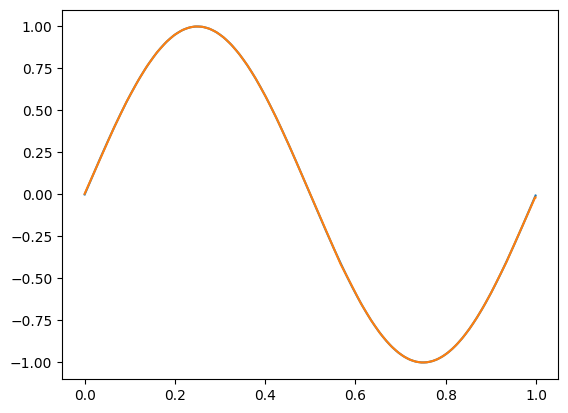

epoch: 5000, acc: 0.939, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0008334722453742291


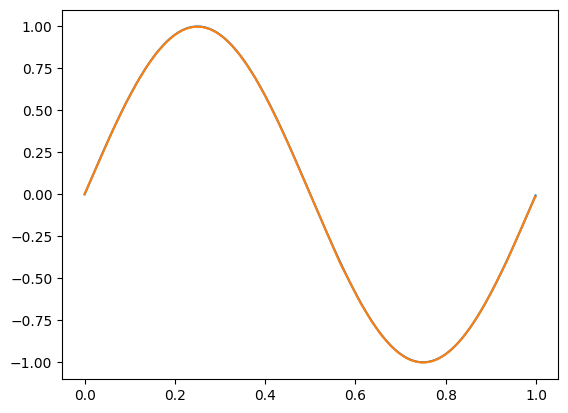

epoch: 6000, acc: 0.982, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.000714387769681383


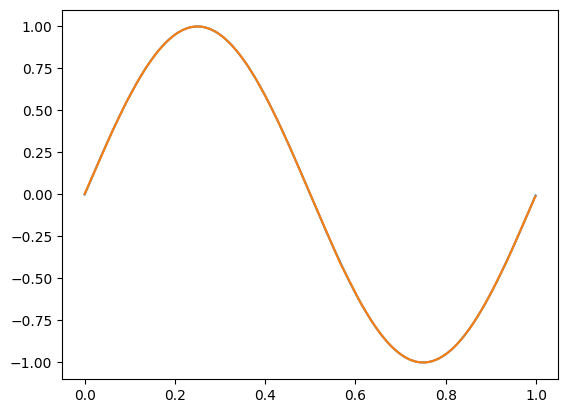

epoch: 7000, acc: 0.582, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0006250781347668457


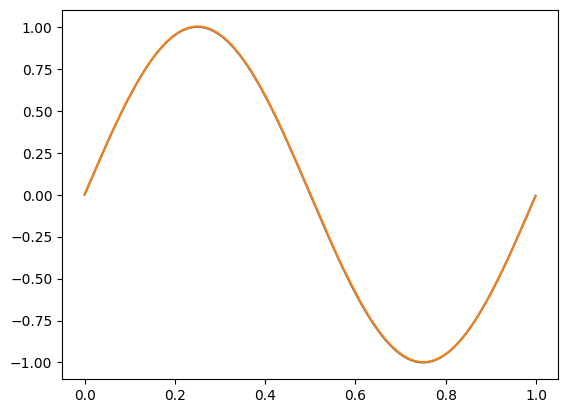

epoch: 8000, acc: 0.987, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.00055561729081009


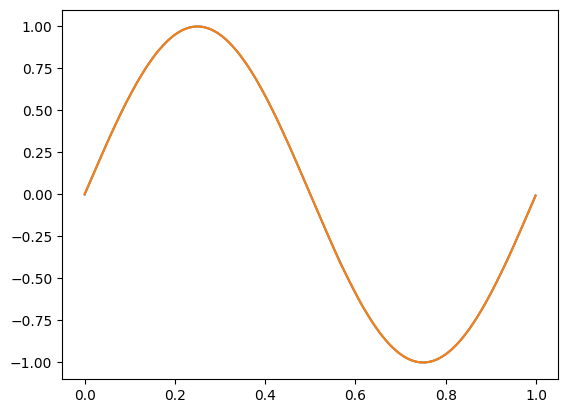

epoch: 9000, acc: 0.582, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.0005000500050005


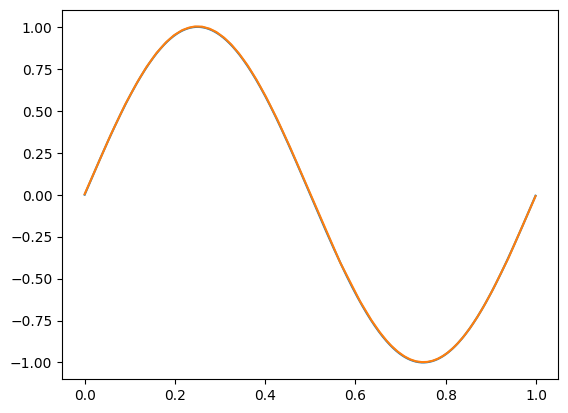

epoch: 10000, acc: 0.276, loss: 0.000 (data_loss: 0.000, reg_loss: 0.000), lr: 0.00045458678061641964


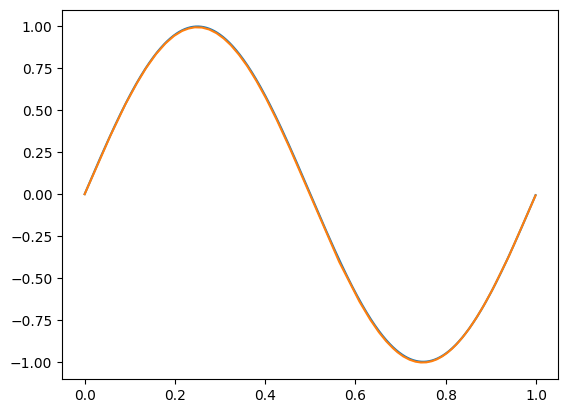

In [214]:
X,y = sine_data()

dense1 = Layer_Dense(1,64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64,64)
activation2 = Activation_ReLU()
dense3 = Layer_Dense(64,1)
activation3 = Activation_Linear()
loss_function = Loss_MeanSquaredError()
optimizer = Optimizer_Adam(learning_rate=.005, decay=1e-3)

accuracy_precision = np.std(y)/250

for epoch in range (10001):
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    activation2.forward(dense2.output)
    dense3.forward(activation2.output)
    activation3.forward(dense3.output)
    
    data_loss = loss_function.calculate(activation3.output, y)
    regularization_loss = loss_function.regularization_loss(dense1) + loss_function.regularization_loss(dense2) + loss_function.regularization_loss(dense3)
    loss = data_loss + regularization_loss

    predictions = activation3.output
    accuracy = np.mean(np.absolute(predictions - y) < accuracy_precision)
    
    if not epoch % 1000:
        print(f'epoch: {epoch}, ' +
            f'acc: {accuracy:.3f}, ' +
            f'loss: {loss:.3f} (' +
            f'data_loss: {data_loss:.3f}, ' +
            f'reg_loss: {regularization_loss:.3f}), ' +
            f'lr: {optimizer.current_learning_rate}')
        X_test, y_test = sine_data()
        dense1.forward(X_test)
        activation1.forward(dense1.output)
        dense2.forward(activation1.output)
        activation2.forward(dense2.output)
        dense3.forward(activation2.output)
        activation3.forward(dense3.output)
        plt.plot(X_test, y_test)
        plt.plot(X_test, activation3.output)
        plt.show()

    loss_function.backward(activation3.output, y)
    activation3.backward(loss_function.dinputs)
    dense3.backward(activation3.dinputs)
    activation2.backward(dense3.dinputs)
    dense2.backward(activation2.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    optimizer.pre_update_params()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_params(dense3)
    optimizer.post_update_params()